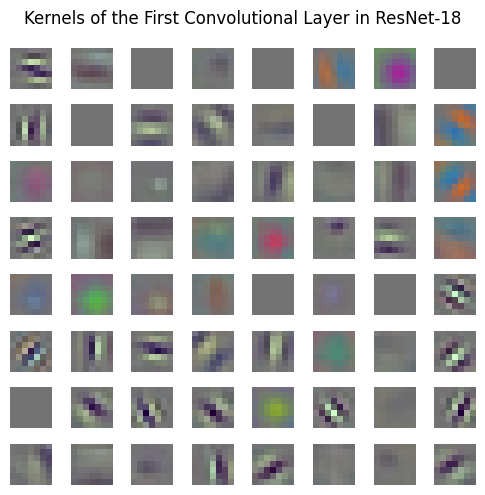

In [2]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt

# Load a pretrained ResNet-18 model
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
first_conv_weights = model.conv1.weight.data.cpu()

# Normalize the weights for visualization
min_w = first_conv_weights.min()
max_w = first_conv_weights.max()
normalized_weights = (first_conv_weights - min_w) / (max_w - min_w)

# Visualize the kernels
num_kernels = normalized_weights.shape[0]  # Number of kernels
plt.figure(figsize=(5, 5))
for i in range(num_kernels):
    kernel = normalized_weights[i].permute(1, 2, 0).numpy()  # Convert to HWC format for visualization
    plt.subplot(8, 8, i + 1)
    plt.imshow(kernel)
    plt.axis('off')
plt.suptitle('Kernels of the First Convolutional Layer in ResNet-18')
plt.tight_layout()
plt.show()
